In [23]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
print(cv2.__version__)

#Pop-up do Matplotlib
#%matplotlib qt

#Exibição na mesma tela do Jupyter
%matplotlib inline

#plt.rcParams["figure.figsize"]\
#(8,5)

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

4.1.0


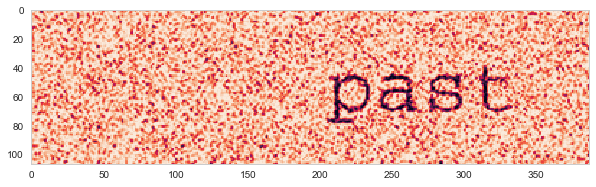

In [24]:
captcha = cv2.imread("imagens/captcha-2.jpg")
captcha = cv2.cvtColor(captcha, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(captcha)

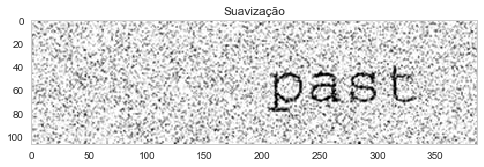

In [25]:
captcha_suavizada = cv2.GaussianBlur(captcha, (5,5), 0)
plt.figure(figsize=(8, 10))
plt.title("Suavização")
plt.imshow(captcha, cmap="gray")

Text(0.5,1,'Limiarização binária')

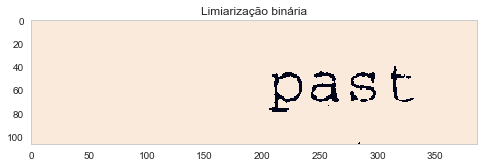

In [34]:
ret, captcha_limiarizada = cv2.threshold(captcha_suavizada, 130, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(8, 10))
plt.imshow(captcha_limiarizada)
plt.title("Limiarização binária")

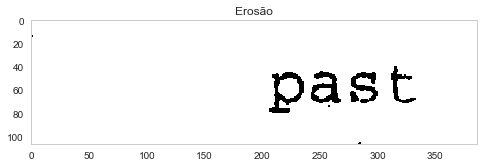

In [35]:
kernel = np.ones((2,2), np.uint8)
captcha_erosao = cv2.erode(captcha_limiarizada, kernel, iterations=1)

plt.figure(figsize=(8, 10))
plt.title("Erosão")
plt.imshow(captcha_erosao, cmap="gray")

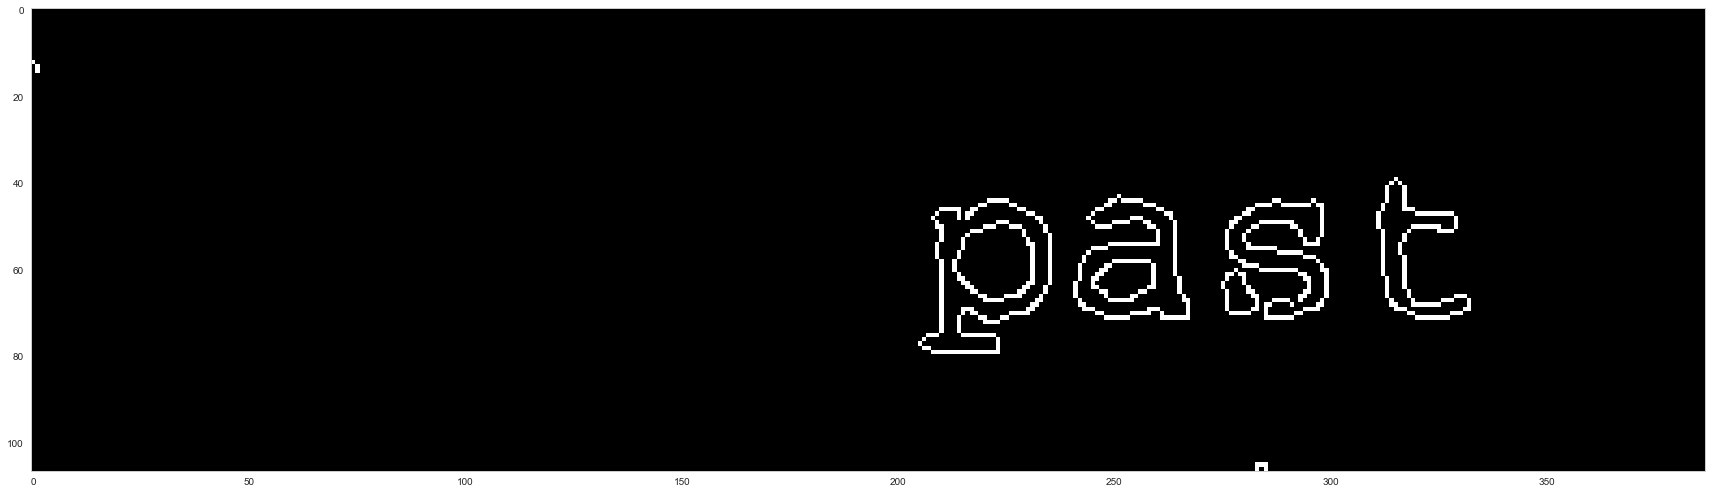

In [42]:
captcha_borda_canny = cv2.Canny(captcha_erosao, 35, 190)

plt.figure(figsize=(30, 30))
plt.imshow(captcha_borda_canny, cmap="gray")

Contornos encontrados 8
53.5
(275, 60, 9, 11)
251.0
(213, 49, 19, 19)
14.0
(276, 44, 24, 28)
10.0
(205, 44, 31, 36)
465.5
(241, 43, 27, 29)
226.5
(311, 39, 22, 33)


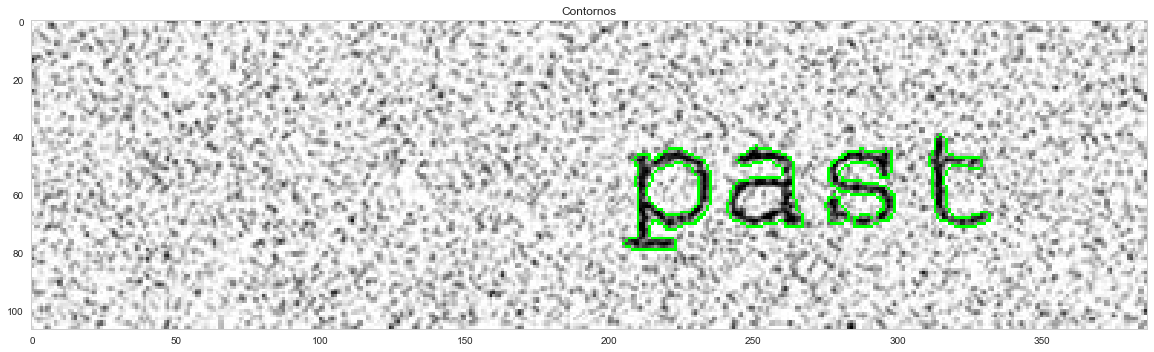

In [43]:
captcha_contornos_objetos, hierarchy_objetos = cv2.findContours(captcha_borda_canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)                                                           
print("Contornos encontrados "+str(len(captcha_contornos_objetos)))

contours_filtrado = []
for idx, captcha_contornos_objetos in enumerate(captcha_contornos_objetos):
    area = cv2.contourArea(captcha_contornos_objetos)
    if area > 1:
        contours_filtrado.append(captcha_contornos_objetos)
        (x, y, w, h) = cv2.boundingRect(captcha_contornos_objetos)
        print(str(area))
        print((x, y, w, h))
len(contours_filtrado)

captcha_objetos_contornos = captcha.copy()
captcha_objetos_contornos = cv2.cvtColor(captcha_objetos_contornos, cv2.COLOR_BGR2RGB)
cv2.drawContours(captcha_objetos_contornos, contours_filtrado, -1, (0,255,0), 1)

plt.figure(figsize=(20, 20))
plt.title("Contornos")
plt.imshow(captcha_objetos_contornos )